In [35]:
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Loading Mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Checking for the first image

5


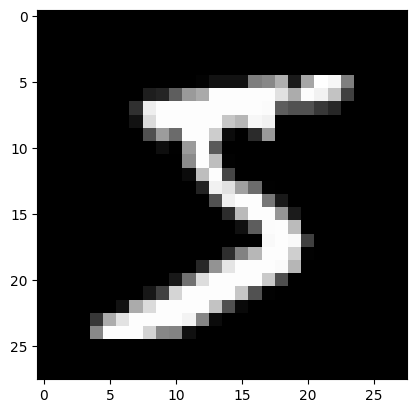

In [7]:
plt.imshow(train_images[0],cmap='gray')
print(train_labels[0])
plt.show()

# Generating the Model

In [42]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [43]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # for integer labels
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='mnist_best_mlp.hdf5',verbose=1,save_best_only=True)
history = model.fit(train_images, train_labels, 
          callbacks=[checkpointer],
          verbose=2,
          epochs=25,
          batch_size=32,
          validation_split=0.2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 1.32682, saving model to mnist_best_mlp.hdf5
1500/1500 - 17s - loss: 3.2800 - accuracy: 0.8773 - val_loss: 1.3268 - val_accuracy: 0.9252 - 17s/epoch - 11ms/step
Epoch 2/25

Epoch 2: val_loss improved from 1.32682 to 0.96912, saving model to mnist_best_mlp.hdf5
1500/1500 - 17s - loss: 0.7515 - accuracy: 0.9482 - val_loss: 0.9691 - val_accuracy: 0.9417 - 17s/epoch - 11ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.96912 to 0.71545, saving model to mnist_best_mlp.hdf5
1500/1500 - 16s - loss: 0.3852 - accuracy: 0.9661 - val_loss: 0.7155 - val_accuracy: 0.9545 - 16s/epoch - 11ms/step
Epoch 4/25

Epoch 4: val_loss did not improve from 0.71545
1500/1500 - 17s - loss: 0.2499 - accuracy: 0.9750 - val_loss: 0.7449 - val_accuracy: 0.9519 - 17s/epoch - 11ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.71545 to 0.70934, saving model to mnist_best_mlp.hdf5
1500/1500 - 16s - loss: 0.1905 - accuracy: 0.9790 - val_loss: 0.7093 - val_accura

# Checking Results

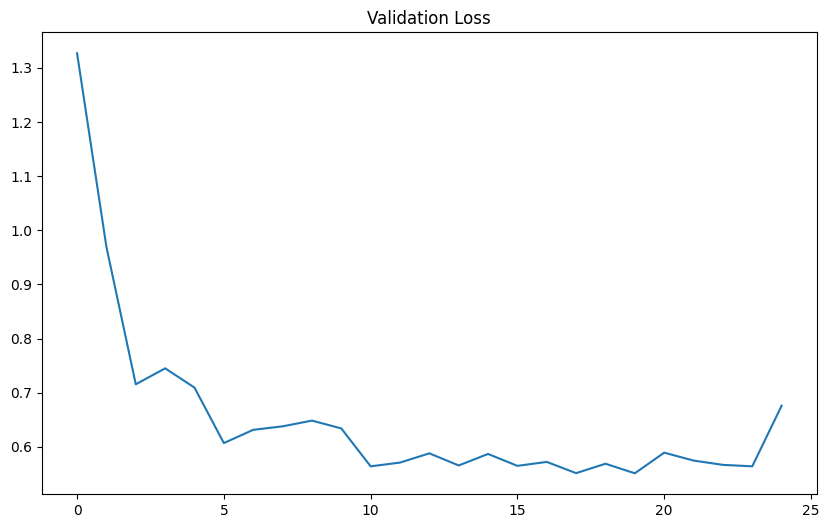

In [46]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
# ['loss', 'accuracy', 'val_loss', 'val_accuracy']
# ax.plot(history.history['val_accuracy'])
ax.plot(history.history['val_loss'])
ax.set_title('Validation Loss')

plt.show()

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5907 - accuracy: 0.9707
Test accuracy: 0.9707000255584717


# Check for prediction

In [90]:
prediction = model.predict(test_images[243].reshape(1,28,28))
probability_df = pd.DataFrame(prediction.T,columns=['Probability'])
probability_df['Probability'] = probability_df['Probability'].round(2)
probability_df

1/1 [==============================] - 0s 22ms/step


,Probability
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


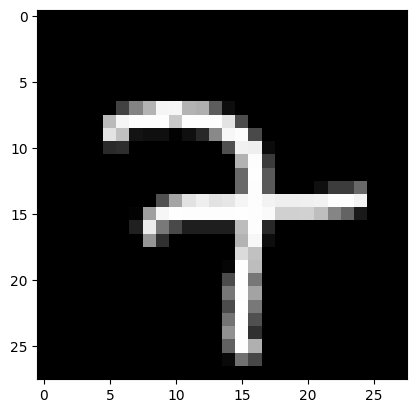

In [91]:
plt.imshow(test_images[243],cmap='gray')
plt.show()